In [68]:
import seaborn as sns

# 앤스콤 4분할 그래프 : 통계 수치(평균, 분산, 상관관계, 회귀선)가 같아도 시각화는 다를 수 있다. 
anscombe = sns.load_dataset("anscombe")

print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

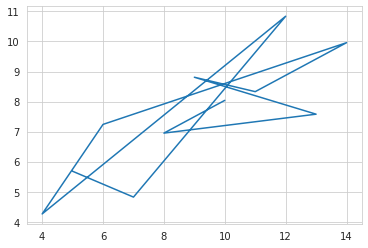

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']

plt.plot(dataset_1['x'], dataset_1['y']) # 선그래프

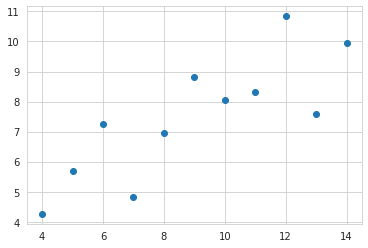

In [70]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o') # 산점도

# 한 번에 4개의 그래프 그리기

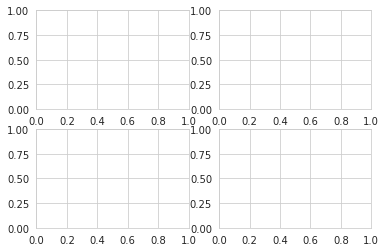

In [71]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure() # 기본틀

# 격자
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

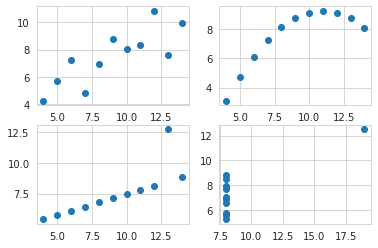

In [72]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o') 

fig

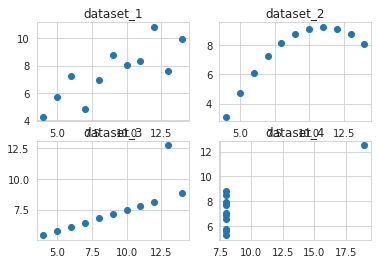

In [73]:
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig

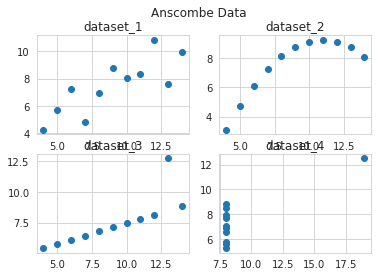

In [74]:
fig.suptitle("Anscombe Data")
fig

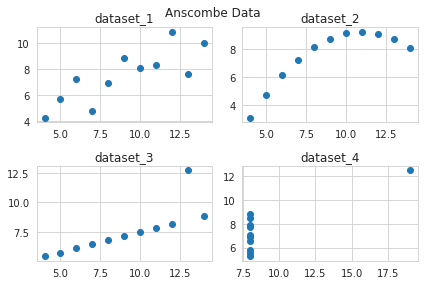

In [75]:
fig.tight_layout()
fig

# ⭐️ matplotlib으로 그래프 그리기

In [76]:
tips = sns.load_dataset('tips') # 식당에서 팁을 지불한 손님의 정보
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


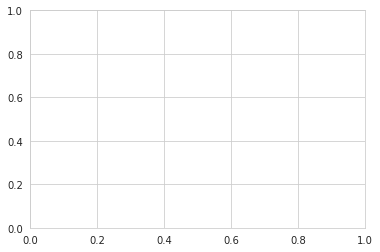

In [77]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

# 히스토그램(단변량 그래프 = 일변량 그래프 : 변수(=열) 1개 사용)

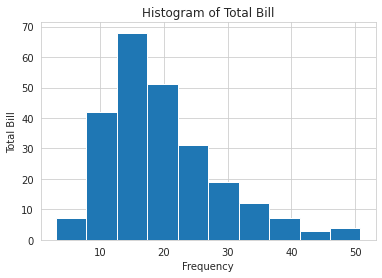

In [78]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

# 산점도(이변량 그래프 : 변수 2개 사용)

Text(0, 0.5, 'Tip')

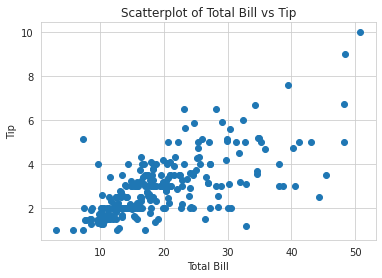

In [79]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# Boxplot = 이산형(ex. sex) + 연속형(ex. tip) 변수

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Tips by Sex')

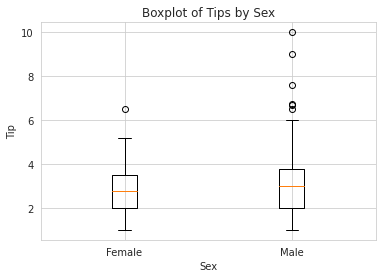

In [80]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
               labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

# 산점도(다변량 그래프 : 변수 3개 이상 사용)

Text(0, 0.5, 'Tip')

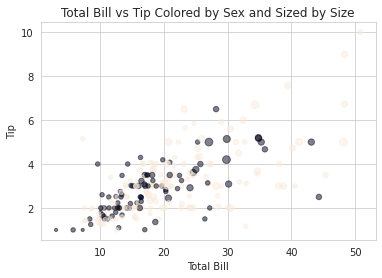

In [81]:
def recode_sex(sex): 
  if sex == 'Female':
    return 0
  else:
    return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],
    s=tips['size'] * 10, # 점의 size
    c=tips['sex_color'], # 점의 color
    alpha=0.5) # 점의 투명도
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# ⭐️ seaborn(matplotlib 라이브러리 기반)로 그래프 그리기

# 히스토그램

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

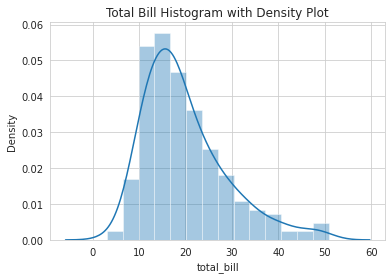

In [82]:
ax = plt.subplots() # 기본 틀

ax = sns.distplot(tips['total_bill']) # 밀집도 그래프
ax.set_title('Total Bill Histogram with Density Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

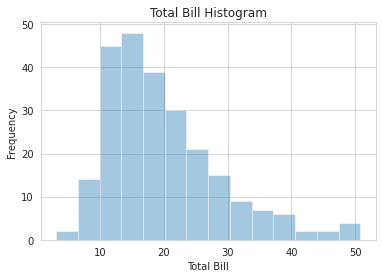

In [83]:
ax = plt.subplots() 

ax = sns.distplot(tips['total_bill'], kde=False) # 밀집도 그래프 x
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

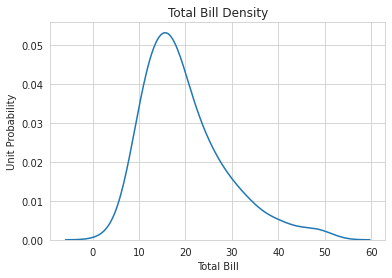

In [84]:
ax = plt.subplots() 

ax = sns.distplot(tips['total_bill'], hist=False) # 밀집도 그래프만
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

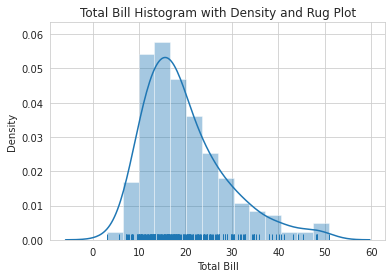

In [85]:
ax = plt.subplots() 

ax = sns.distplot(tips['total_bill'], rug=True) # 양탄자 그래프
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

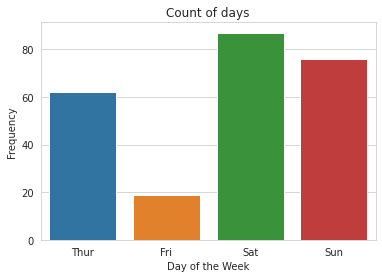

In [86]:
ax = plt.subplots() 

ax = sns.countplot('day', data=tips) # 이산값
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

# 산점도 + 회귀선(이변량 그래프)

Text(0, 0.5, 'Tip')

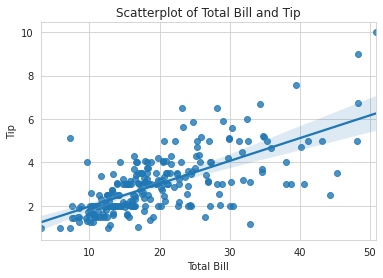

In [87]:
ax = plt.subplots() 

ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

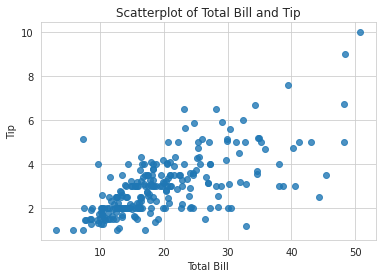

In [88]:
ax = plt.subplots() 

ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) # 회귀선 제거
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# 산점도 + 히스토그램

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

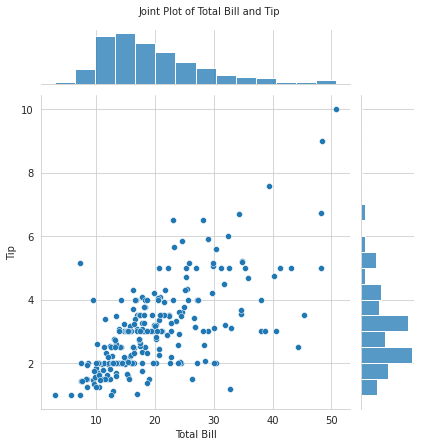

In [89]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

# 육각도 + 히스토그램

Text(0.5, 1.03, 'Hexbin Joint PLot of Total Bill and Tip')

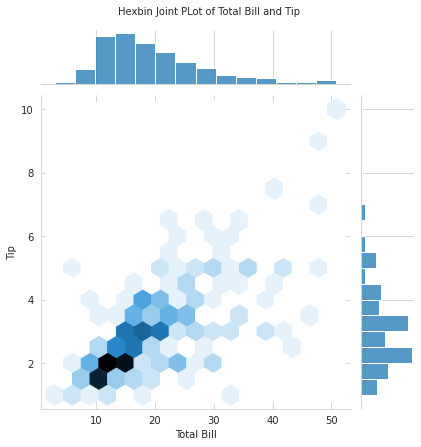

In [90]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint PLot of Total Bill and Tip', fontsize=10, y=1.03)

# 이차원 밀집도

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

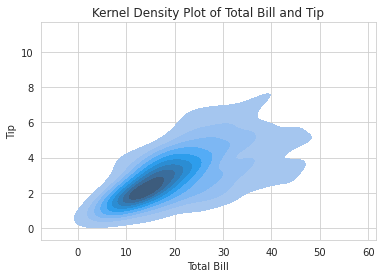

In [91]:
ax = plt.subplots() 

ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True) # 음영 효과
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# 막대 그래프

Text(0, 0.5, 'Average total bill')

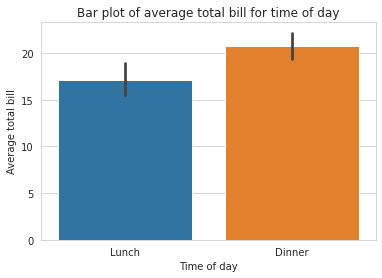

In [92]:
ax = plt.subplots() 

ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

# Boxplot

Text(0, 0.5, 'Total Bill')

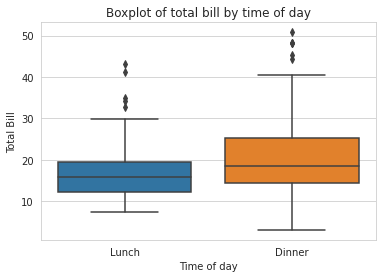

In [93]:
ax = plt.subplots() 

ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

# violinplot

Text(0, 0.5, 'Total Bill')

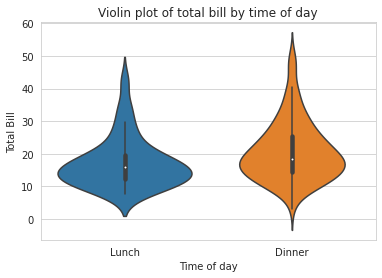

In [94]:
ax = plt.subplots() 

ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

# 관계 그래프

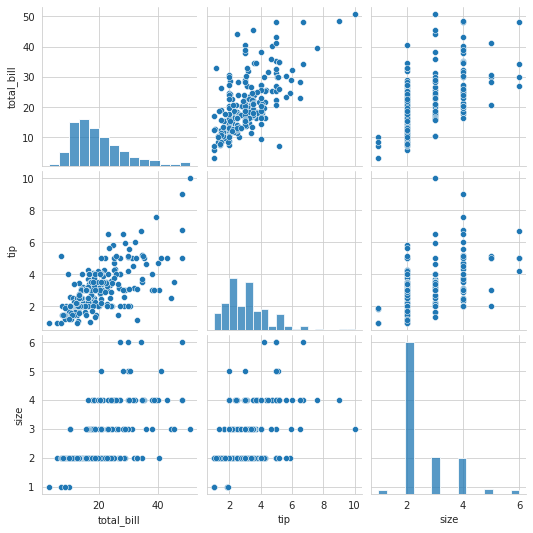

In [95]:
fig = sns.pairplot(tips)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

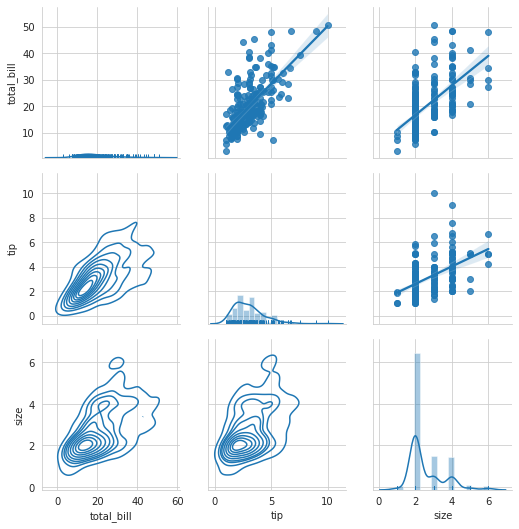

In [96]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) # 산점도 + 회귀선
pair_grid = pair_grid.map_lower(sns.kdeplot) # 이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) # 히스토그램 + 밀집도
plt.show()

# 다변량 그래프

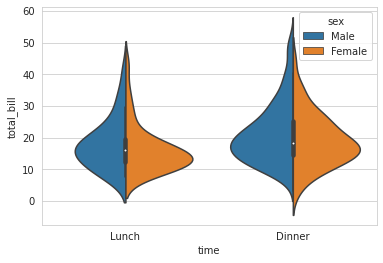

In [97]:
ax = plt.subplots() 

ax = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex', split=True)

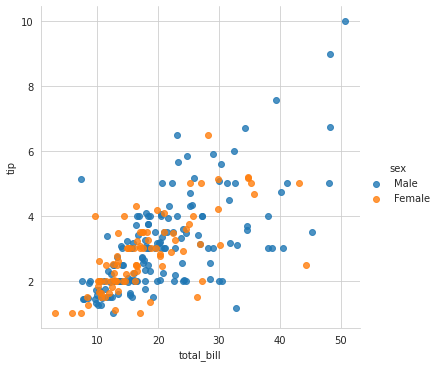

In [98]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

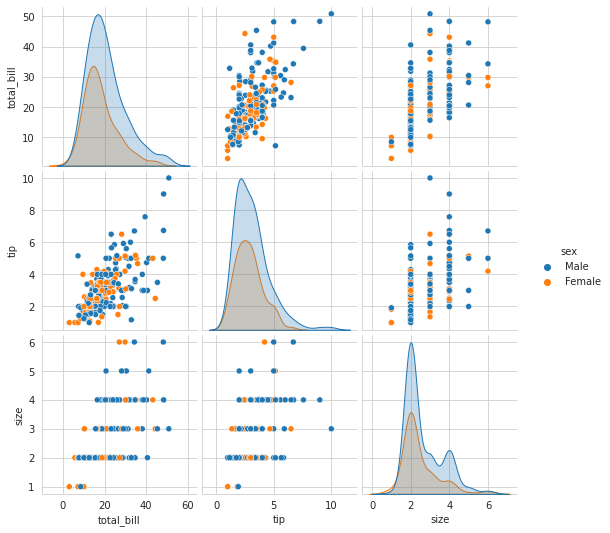

In [99]:
fig = sns.pairplot(tips, hue='sex')

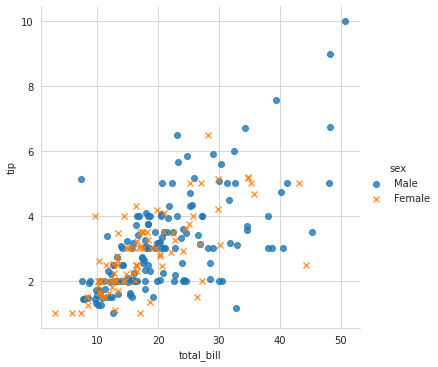

In [100]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, 
                     hue='sex', markers=['o', 'x'])

# 그룹별 그래프

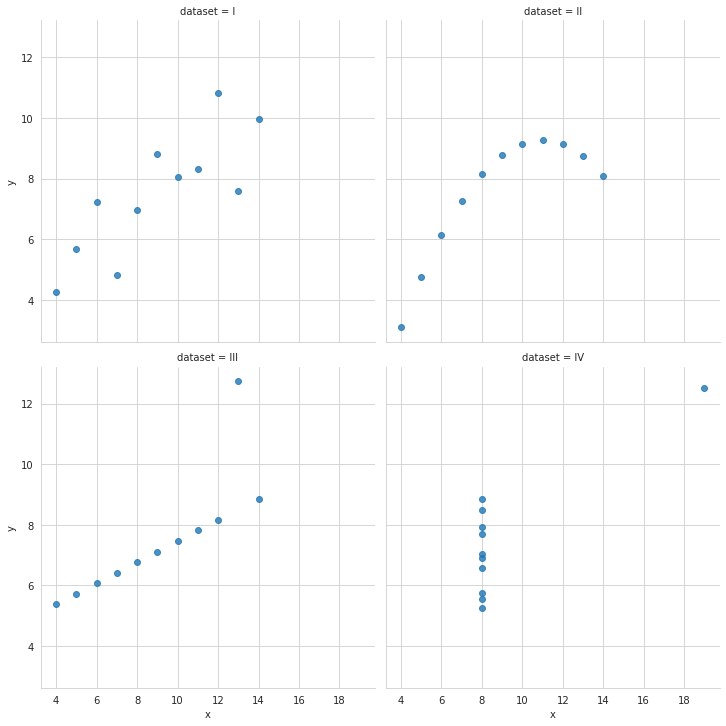

In [101]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

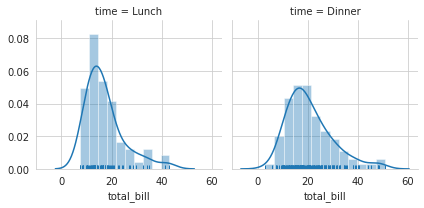

In [102]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

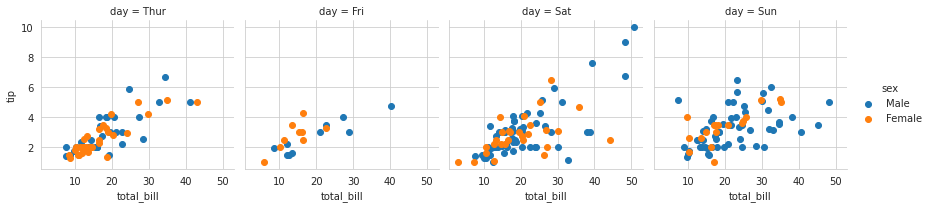

In [103]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

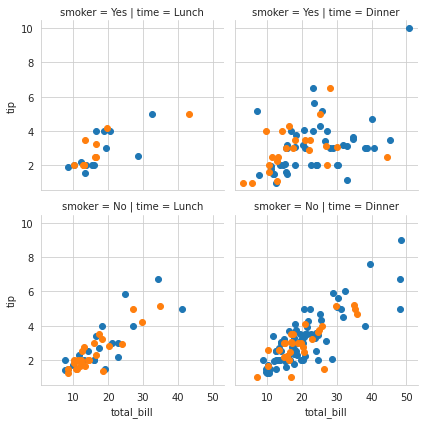

In [104]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

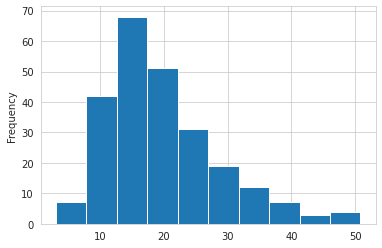

In [105]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

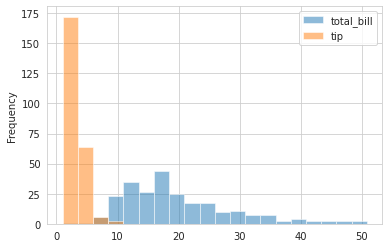

In [106]:
fig, ax = plt.subplots()

ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

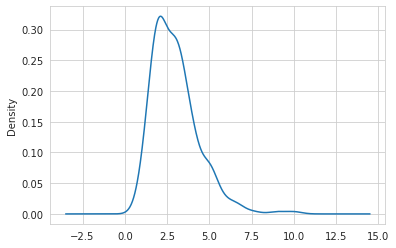

In [107]:
ax = plt.subplots()

ax = tips['tip'].plot.kde() # 밀집도

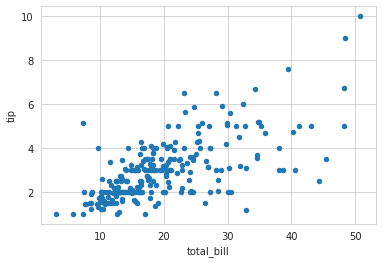

In [108]:
fig, ax = plt.subplots()

ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

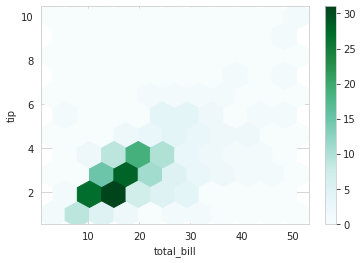

In [109]:
fig, ax = plt.subplots()

ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

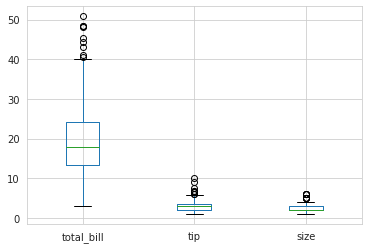

In [110]:
fig, ax = plt.subplots()

ax = tips.plot.box(ax=ax)

# seaborn - 그래프 스타일 설정

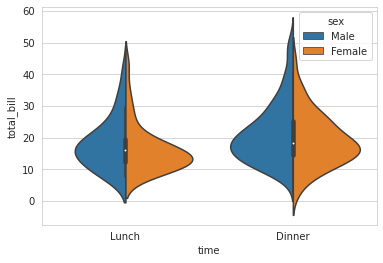

In [111]:
sns.set_style('whitegrid') # 가로줄

fig, ax = plt.subplots()

ax = sns.violinplot(x = 'time', y='total_bill', hue='sex', data=tips, split=True)

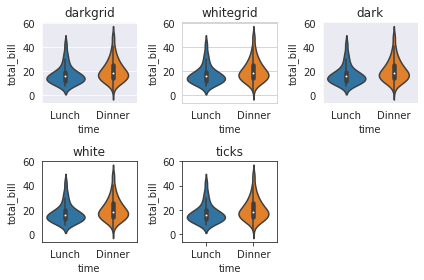

In [112]:
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position = idx + 1
  with sns.axes_style(style):
    ax = fig.add_subplot(2, 3, plot_position)
    violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
    violin.set_title(style)

fig.tight_layout()